In [52]:
library(tidyverse)

In [53]:
can_lang <- read_csv("can_lang.csv")
print(can_lang, n=10)

Rows: 214 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): category, language
dbl (4): mother_tongue, most_at_home, most_at_work, lang_known

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 214 × 6
   category          language mother_tongue most_at_home most_at_work lang_known
   <chr>             <chr>            <dbl>        <dbl>        <dbl>      <dbl>
 1 Aboriginal langu… Aborigi…           590          235           30        665
 2 Non-Official & N… Afrikaa…         10260         4785           85      23415
 3 Non-Official & N… Afro-As…          1150          445           10       2775
 4 Non-Official & N… Akan (T…         13460         5985           25      22150
 5 Non-Official & N… Albanian         26895        13135          345      31930
 6 Aboriginal langu… Algonqu…            45           10            0        120
 7 Aboriginal langu… Algonqu…          1260          370           40       2480
 8 Non-Official & N… America…          2685         3020         1145      21930
 9 Non-Official & N… Amharic          22465        12785          200      33670
10 Non-Official & N… Arabic          419890       223535         5585     629055
# ℹ 204 

In [54]:
ab_lang <- filter(can_lang, category == "Aboriginal languages")
print(ab_lang, n=10)

# A tibble: 67 × 6
   category          language mother_tongue most_at_home most_at_work lang_known
   <chr>             <chr>            <dbl>        <dbl>        <dbl>      <dbl>
 1 Aboriginal langu… Aborigi…           590          235           30        665
 2 Aboriginal langu… Algonqu…            45           10            0        120
 3 Aboriginal langu… Algonqu…          1260          370           40       2480
 4 Aboriginal langu… Athabas…            50           10            0         85
 5 Aboriginal langu… Atikame…          6150         5465         1100       6645
 6 Aboriginal langu… Babine …           110           20           10        210
 7 Aboriginal langu… Beaver             190           50            0        340
 8 Aboriginal langu… Blackfo…          2815         1110           85       5645
 9 Aboriginal langu… Carrier           1025          250           15       2100
10 Aboriginal langu… Cayuga              45           10           10        125
# ℹ 57 mo

In [55]:
selected_lang <- select(ab_lang, language, mother_tongue)
print(selected_lang, n=10)

# A tibble: 67 × 2
   language                     mother_tongue
   <chr>                                <dbl>
 1 Aboriginal languages, n.o.s.           590
 2 Algonquian languages, n.i.e.            45
 3 Algonquin                             1260
 4 Athabaskan languages, n.i.e.            50
 5 Atikamekw                             6150
 6 Babine (Wetsuwet'en)                   110
 7 Beaver                                 190
 8 Blackfoot                             2815
 9 Carrier                               1025
10 Cayuga                                  45
# ℹ 57 more rows


In [56]:
ordered_lang <- arrange(selected_lang, by = desc(mother_tongue))
print(ordered_lang, n=10)


# A tibble: 67 × 2
   language          mother_tongue
   <chr>                     <dbl>
 1 Cree, n.o.s.              64050
 2 Inuktitut                 35210
 3 Ojibway                   17885
 4 Oji-Cree                  12855
 5 Dene                      10700
 6 Montagnais (Innu)         10235
 7 Mi'kmaq                    6690
 8 Atikamekw                  6150
 9 Plains Cree                3065
10 Stoney                     3025
# ℹ 57 more rows


In [57]:
ten_lang <- slice(ordered_lang, 1:10)
ten_lang

language,mother_tongue
<chr>,<dbl>
"Cree, n.o.s.",64050
Inuktitut,35210
Ojibway,17885
Oji-Cree,12855
Dene,10700
Montagnais (Innu),10235
Mi'kmaq,6690
Atikamekw,6150
Plains Cree,3065


In [58]:
canadian_pop = 35151728
ten_lang_with_percent <- mutate(ten_lang, mother_tongue_percent = mother_tongue / canadian_pop * 100)
ten_lang_with_percent

language,mother_tongue,mother_tongue_percent
<chr>,<dbl>,<dbl>
"Cree, n.o.s.",64050,0.182210104
Inuktitut,35210,0.100165773
Ojibway,17885,0.050879433
Oji-Cree,12855,0.036570037
Dene,10700,0.030439471
Montagnais (Innu),10235,0.029116634
Mi'kmaq,6690,0.019031781
Atikamekw,6150,0.017495584
Plains Cree,3065,0.008719344


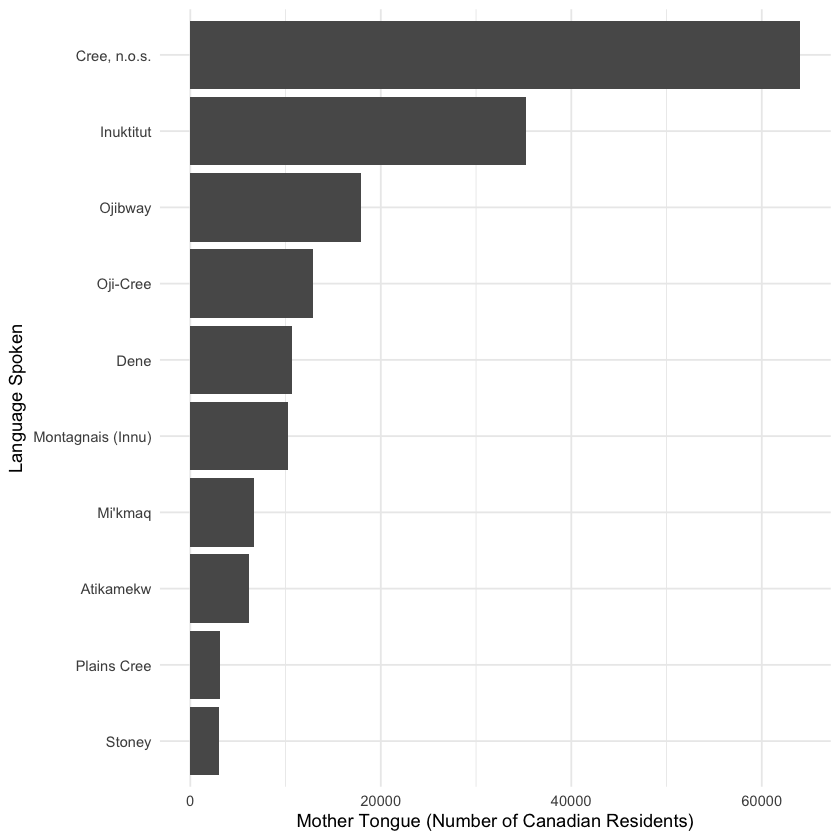

In [65]:
ggplot(ten_lang, aes(y = reorder(language, mother_tongue), x = mother_tongue)) + 
    geom_bar(stat="identity") +
    ylab("Language Spoken") +
    xlab("Mother Tongue (Number of Canadian Residents)") +
    theme_minimal()